## Mission 7: KBO Scouting Challenge-1
### 대회 설명

2011년부터 2018년까지 KBO에서 활약했던 외국인 투수들의 한국에 오기 전 메이저리그 데이터와, 한국프로야구에서의 성적 데이터가 주어집니다.

그리고 2019년에 새로 뽑힌 13명의 외국인 투수들의 과거 메이저리그 데이터가 주어집니다. 

 

참가자들은 2018년까지의 외국인 투수들의 데이터를 바탕으로 2019년에 새로 들어온 외국인 투수 중 2명을 스카우팅해야 합니다.

당신이 스카우트라면 어떤 투수를 뽑을 것입니까?

 

물론 2011년부터 2018년까지 외국인 선수가 60명 정도밖에 되지 않으므로 복잡한 머신러닝 모델을 이용해 예측하는 것은 힘들 것입니다.

참가자들은 다양한 시각화를 통한 인사이트들을 바탕으로 논리적으로 가장 팀에 도움될 것이라고 생각되는 투수 2명을 뽑으셔야 합니다.

## 스카우팅을 위한 개요
### 제안방법: KBO에서 오랫동안 활약한 투수가 좋은 투수라 생각하고 2019년 신규 외국인 투수중 이와 비슷한 유형의 투수를 제안한다. 

1. 2011~2018년까지 외국인 투수의 지표 분석
2. 2011~2018년에 활약한 외국인 투수중 오랫동안 활약한 투수의 지표분석
3. 2019년 새롭게 들어온 외국인 투수의 지표 분석
4. KBO에서 오랫동안 활약한 외국인 투수와 지표의 성격이 비슷한 투수를 제안

## 1. 2011~2018년까지 외국인 투수의 지표 분석

In [48]:
# 데이터 로딩

import pandas as pd
# 2011년부터 2018년까지 KBO에서 활약한 외국인 투수들의 역대 KBO 정규시즌 성적
ob_k = pd.read_csv('kbo_yearly_foreigners_2011_2018.csv')
# 2011년부터 2018년까지 KBO에서 활약한 외국인 투수들의 KBO 입성 전, 메이저리그에서의 역대 정규시즌 성적
ob_m = pd.read_csv('fangraphs_foreigners_2011_2018.csv') 
# 2011년부터 2018년까지 KBO에서 활약한 외국인 투수들의 KBO입성 전, 메이저리그에서의 스탯캐스트 데이터
ob_s = pd.read_csv('baseball_savant_foreigners_2011_2018.csv') 
# 2019년 신규 외국인 투수들의 메이저리그에서의 역대 정규시즌 성적
nb_m = pd.read_csv('fangraphs_foreigners_2019.csv') 
# 2019년 신규 외국인 투수들의 메이저리그에서의 스탯캐스트 데이터
nb_s = pd.read_csv('baseball_savant_foreigners_2019.csv') 

In [49]:
# 그리기 준비
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [50]:
# 투수별 KBO에서 활약한 총연수를 구하기 위한 작업

A = ob_k.groupby(ob_k.pitcher_name).size() # 투수별 활약한 총연수를 구한다. 
B = pd.DataFrame({'pitcher_name':A.index, 'years':A.values})
OB = pd.merge(ob_m, B) # 기존 MLB 자료에 한국에서 활약한 총연수 지표를 추가한다

## 2. 2011~2018년에 활약한 외국인 투수중 오랫동안 활약한 투수의 지표분석

In [51]:
# PCA 방식으로 지표를 분석한다. 
# 그래프를 그리기 용이한 2개 컴포넌트를 사용하기로 한다. 

from sklearn.decomposition import PCA
pca = PCA(2)  # project to 2 dimensions
ob_m_pure_index = OB[[ 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%']] # 활약한 해와 이름등을 제외한 의미있는 지표만을 취한다. 
ob_projected = pca.fit_transform(ob_m_pure_index) # PCA 분석및 프로젝션 수행

In [52]:
# 선수에 대한 그래프 표시 간편화를 위해 선수의 지료 대표값으로 평균을 택한다. 

OB_mean = OB.groupby('pitcher_name').mean()

In [53]:
# 그래프 위한 폰트설정

import matplotlib as mpl
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (14,4)
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

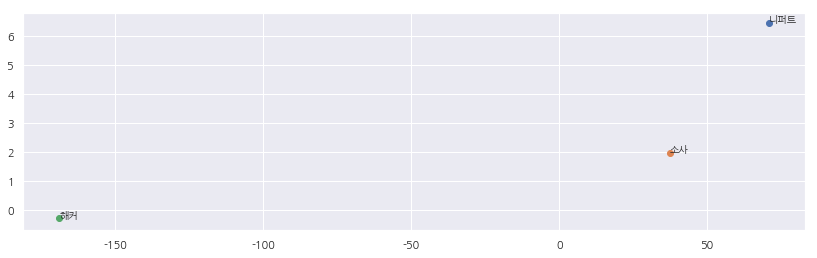

In [54]:
# 기존 외국인 투수를 PCA 평면에 그린다. 
# KBO에서 오랫동안 활약한 투수를 훌륭한 투수로 가정한다. 
# 이를 기준으로 신규 투수를 스카우팅하고자 한다. 
# 여기서는 KBO에서 6년이상 활약한 투수만을 대상으로 한다.
WORK_YEARS = 6

OB_mean_pure_index = OB_mean[[ 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%']] # 이름과 활약한 연을 제외한 숫자 지표를 얻어온다. 
OB_mean_projected = pca.transform(OB_mean_pure_index) # PCA 평면으로 이동

fig, ax = plt.subplots()

for i, txt in enumerate(OB_mean.index):    
    if OB_mean.iloc[i]['years'] >= WORK_YEARS:
        ax.scatter(OB_mean_projected[i, 0], OB_mean_projected[i, 1])
        ax.annotate(txt,  (OB_mean_projected[i,0], OB_mean_projected[i,1]))

## 3. 2019년 새롭게 들어온 외국인 투수의 지표 분석

In [55]:
# 신규 선수의 지표를 구한다. 
# 여러해 활약한 선수를 고려하여 선수의 평균 지표를 선수를 나타내는 대표값으로 한다. 

NB = nb_m[[  'pitcher_name', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%']] #
NB_mean = NB.groupby('pitcher_name').mean() # 평균을 선수를 나타내는 대표값으로 취한다. 
NB_mean['label'] = list(range(1, NB_mean.shape[0] + 1))

In [56]:
# 선수구별을 위한 숫자 라벨을 붙인다. 
NB_mean['label'] = list(range(1, NB_mean.shape[0] + 1))
NB_mean


,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%,label
pitcher_name,,,,,,,,,,,,,,,,,,
루친스키,6.832500,-0.025000,61.500000,15.750000,1.250000,5.750000,1.500000,11.000000,1.972500,0.412250,5.267500,0.183750,0.48425,0.501250,0.126500,0.090750,0.449500,1
맥과이어,4.395000,-0.200000,116.500000,24.000000,5.000000,14.000000,3.000000,22.000000,1.280000,0.249500,5.055000,0.188000,0.32450,0.601000,0.086500,0.093000,0.441000,2
버틀러,5.878000,-0.120000,240.800000,64.200000,8.600000,23.400000,2.200000,30.600000,1.678000,0.313600,5.564000,0.224400,0.48680,0.639600,0.086400,0.065600,0.468200,3
서폴드,5.596667,-0.200000,162.333333,40.666667,5.000000,15.666667,3.000000,23.333333,1.720000,0.354667,4.506667,0.248333,0.46300,0.492333,0.068667,0.083333,0.463333,4
알칸타라,7.190000,-0.450000,105.500000,26.500000,7.000000,8.000000,3.500000,13.000000,1.495000,0.265000,7.475000,0.180500,0.44150,0.639000,0.062000,0.071000,0.459000,5
요키시,1.880000,-0.200000,66.000000,18.000000,3.000000,4.000000,0.000000,10.000000,1.530000,0.306000,5.300000,0.235000,0.51000,0.582000,0.077000,0.084000,0.466000,6
윌랜드,7.702500,-0.125000,59.000000,15.250000,2.750000,4.750000,0.250000,9.750000,1.662500,0.325500,5.692500,0.241250,0.41575,0.606250,0.057750,0.075750,0.440750,7
채드벨,7.760000,-0.150000,164.500000,47.500000,6.500000,16.500000,1.500000,32.000000,1.990000,0.431500,4.655000,0.252000,0.44700,0.515500,0.029000,0.101000,0.456500,8
켈리,5.752500,0.050000,99.500000,29.000000,2.500000,6.250000,1.500000,14.000000,1.682500,0.358000,4.362500,0.206000,0.48250,0.619500,0.109500,0.083000,0.476500,9


In [57]:
# 분석을 위해 이름을 제외한 숫자 지표를 사용한다. 

NB_pure_index = NB_mean[[   'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%']]

In [58]:
# 그래프 위한 폰트설정

import matplotlib as mpl
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (14,4)
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

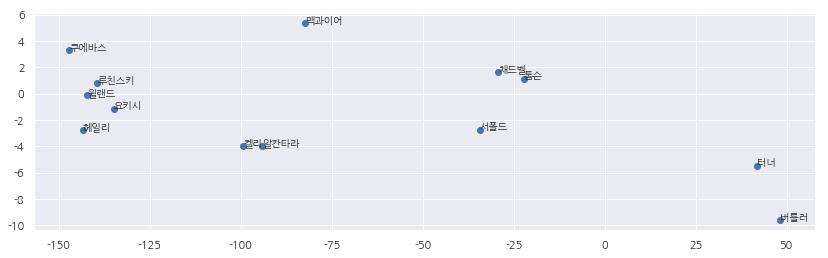

In [59]:
# 신규 외국인 투수의 지표를 PCA 평면에서 그리기

NB_projected = pca.transform(NB_pure_index) # 신규 외국인 투수의 PCA에 따른 프로젝션

# 그래프 그리기
fig, ax = plt.subplots()
ax.scatter(NB_projected[:, 0], NB_projected[:, 1])

for i, txt in enumerate(NB_mean.index):
    ax.annotate(txt,  (NB_projected[i,0], NB_projected[i,1]))

## 4. KBO에서 오랫동안 활약한 외국인 투수와 지표의 성격이 비슷한 투수를 제안

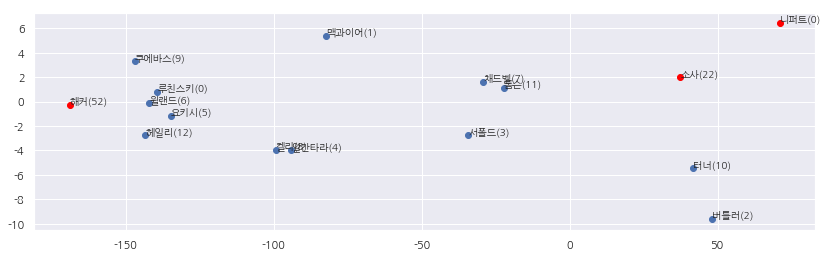

In [60]:
# KBO 멤버의 mlb 성적과 NEWBIE의 mlb 성적 동시 표시

WORK_YEARS = 6 # 6년 이상 활약한 선수를 표시한다. 

# KBO에서 활약한 외국인 투수의 MLB 성적을 PCA 평면에 표시
fig, ax = plt.subplots()

for i, txt in enumerate(OB_mean.index):    
    if OB_mean.iloc[i]['years'] >= WORK_YEARS:
        txt_ = txt + '(' + str(i) + ')'
        ax.scatter(OB_mean_projected[i, 0], OB_mean_projected[i, 1], color='red') # 기존 KBO 투수는 구별을 위해 빨간색으로 표시
        ax.annotate(txt_,  (OB_mean_projected[i,0], OB_mean_projected[i,1]))


# 2019년 신규 외국인 투수의 MLB 성적을 PCA 평면에 표시
                            
ax.scatter(NB_projected[:, 0], NB_projected[:, 1])

for i, txt in enumerate(NB_mean.index):
    txt_ = txt + '(' + str(i) + ')'
    ax.annotate(txt_,  (NB_projected[i,0], NB_projected[i,1]))
                            


### 그래프 분석

PCA평면에서는 방향과 크기가 비슷한 값이 비슷한 지표를 가진 투수라 볼 수 있다. 
KBO에서 오랫동안 활약한 니퍼트와 소사와 비슷한 유형의 투수로 터너와 버틀러를 들 수 있다. 

### 스카우팅 제안 
터너와 버틀러를 스카우터로서 팀에 가장 도움이 될 투수로 제안한다.


## 결론

2019년 신규 외국인 투수를 스카우팅하는 방식을 설명하였다. KBO에서 오랫동안 활약한 투수를 기준으로 이와 비슷한 유형의 투수를 스카우터로서 제안을 하였다. 투수의 지표를 분석하는 방법으로는 PCA 방식을 사용하였고 터너와 버틀러를 팀에 가장 도움이 될 투수로 제안하였다. 